In [1]:
RANDOM_SEED = 42

In [2]:
path_ = "../Spectrograms"

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
#Preparing images for model training --- image size = 256 x 256
train_batch = 64
test_batch = 64
train_set= image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=train_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='training')
                                
val_set =  image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=test_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='validation')

Found 10625 files belonging to 2 classes.
Using 8500 files for training.
Found 10625 files belonging to 2 classes.
Using 2125 files for validation.


In [7]:
test_ds_size = int(34 * 0.5) 
test_test_set = val_set.take(test_ds_size)
test_set = val_set.skip(test_ds_size)

In [8]:
val_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=34>

In [9]:
train_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=133>

In [10]:
test_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=17>

In [6]:
from keras.layers import Conv2D,Flatten,Dense,AveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint 
from keras import regularizers
from livelossplot import PlotLossesKeras

In [7]:
model_1 = Sequential()

model_1.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu',padding='valid'))
model_1.add(BatchNormalization()),
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(16,(3,3),activation='relu'))
model_1.add(BatchNormalization()),
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(1,activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 16)     64        
 hNormalization)                                                 
                                                        

In [14]:
filepath = "Models/base-model-checkpoints/H-base-model-19.h5"

callbacks = [ModelCheckpoint(filepath=filepath, monitor="val_accuracy", mode='max', save_best_only=True),
            PlotLossesKeras()]

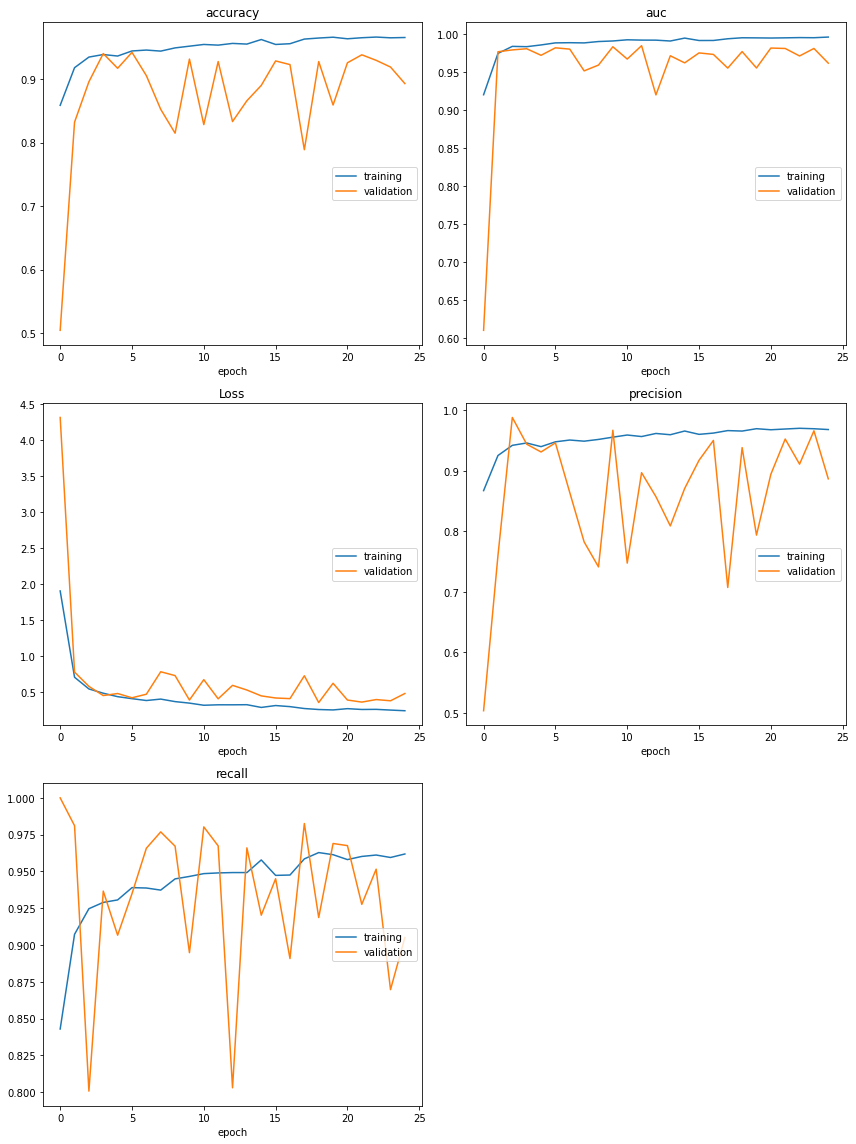

accuracy
	training         	 (min:    0.859, max:    0.966, cur:    0.966)
	validation       	 (min:    0.504, max:    0.942, cur:    0.893)
auc
	training         	 (min:    0.920, max:    0.996, cur:    0.996)
	validation       	 (min:    0.610, max:    0.984, cur:    0.961)
Loss
	training         	 (min:    0.237, max:    1.903, cur:    0.237)
	validation       	 (min:    0.351, max:    4.317, cur:    0.477)
precision
	training         	 (min:    0.867, max:    0.970, cur:    0.968)
	validation       	 (min:    0.503, max:    0.988, cur:    0.887)
recall
	training         	 (min:    0.843, max:    0.963, cur:    0.962)
	validation       	 (min:    0.801, max:    1.000, cur:    0.905)
133/133 [==============================] - 43s 319ms/step - loss: 0.2371 - accuracy: 0.9655 - recall: 0.9619 - precision: 0.9681 - auc: 0.9956 - val_loss: 0.4768 - val_accuracy: 0.8930 - val_recall: 0.9051 - val_precision: 0.8866 - val_auc: 0.9613


In [15]:
h = model_1.fit(train_set,
                epochs=25,
                validation_data=test_set,
                callbacks=callbacks
                )

In [19]:
model_1.evaluate(test_test_set)

17/17 [==============================] - 2s 86ms/step - loss: 0.4444 - accuracy: 0.9035 - recall: 0.9225 - precision: 0.8920 - auc: 0.9664


[0.4444003999233246,
 0.9034926295280457,
 0.9225225448608398,
 0.891986072063446,
 0.9664283394813538]

In [11]:
model = keras.models.load_model('Models/base-model-checkpoints/H-base-model-19.h5')

In [12]:
tf.keras.utils.plot_model(model,to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
model.evaluate(test_test_set)

17/17 [==============================] - 3s 108ms/step - loss: 0.4050 - accuracy: 0.9347 - recall: 0.9171 - precision: 0.9504 - auc: 0.9843


[0.4050043225288391,
 0.9347426295280457,
 0.9171270728111267,
 0.9503816962242126,
 0.9843175411224365]